# Cat / Dog Image Classification Model

In [1]:
import shutil

In [2]:
shutil.unpack_archive('datasets/cats_dogs.zip')

### Loading image data into Keras

In [4]:
from tensorflow.keras.utils import load_img
import numpy as np
import os

In [5]:
dog1='./dataset/training_set/dogs/'

In [9]:
## One way to loop over files in a directory
data = []
for img in os.listdir(dog1):
    img_path = dog1+img
    if img_path[-4:] == '.jpg':
        data.append(load_img(dog1+img))
print(data)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=393x392 at 0x15542FE80>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x15542F3A0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x500 at 0x1551F00D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=372x500 at 0x1551F01C0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x497 at 0x1551F2F20>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=390x499 at 0x1551F0D60>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x218 at 0x1551F0100>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x338 at 0x1551F0070>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=396x369 at 0x1551F2560>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x336 at 0x1551C2890>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=267x399 at 0x1551C28F0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x372 at 0x1551C2950>, <PIL.JpegImagePlugin.JpegImageFile imag

In [10]:
## We can also use an image data generator -- augment images to create a much larger dataset
image = './dataset/training_set/dogs/dog.1004.jpg'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

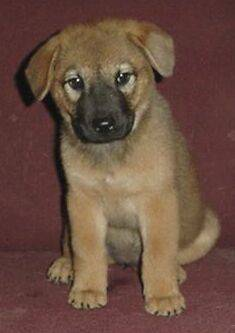

In [14]:
test_img = load_img(image)
test_img

In [15]:
from tensorflow.keras.utils import img_to_array, array_to_img

In [17]:
x = img_to_array(test_img)
x.shape

(333, 235, 3)

In [18]:
# reshape x -- Keras can only work with image data in teh format n,h,w,c
    # n = number of images
    # h = height of image
    # w = width of image
    # c = color channels
x=x.reshape(1,333,235,3)
x.shape

(1, 333, 235, 3)

In [21]:
# creates a new folder with a ton of images that are just augmentations of the above image
c=0
for i in datagen.flow(x,
                      batch_size=1,
                      save_to_dir='augmented_images/',
                      save_prefix='dog',
                      save_format='png'):
    c+=1
    if c>30:
        break

## Steps for Image Classification
1. Create a training folder, with sub-folders for each class of image (in this case one folder for cats, one for dogs)
2. Create a test folder with the same directory structure as the training folder
3. Point the ImageGen at the training folder -- Do augmentation on the fly for training to increase training set

In [23]:
# Load images with the help of image data generator
trainGen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            rescale=1/255         # scale pixel values to between 0-1
                        )
testGen = ImageDataGenerator(rescale=1/255)

In [25]:
training_set_dir = './dataset/training_set'
train_generator = trainGen.flow_from_directory(training_set_dir,
                                                target_size=(200,200),
                                                batch_size=16,
                                                class_mode='binary',
                                                shuffle=True
                                                )

Found 8000 images belonging to 2 classes.


In [26]:
test_set_dir = './dataset/test_set'
test_generator = testGen.flow_from_directory(test_set_dir,
                                                target_size=(200,200),
                                                batch_size=16,
                                                class_mode='binary',
                                                shuffle=True
                                                )

Found 2000 images belonging to 2 classes.


## Build the Model

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
model = Sequential()
model.add(Input(shape=(200,200,3)))  # from target size above -- arbitrary

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)      

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
es = EarlyStopping(monitor='val_loss', patience=5)

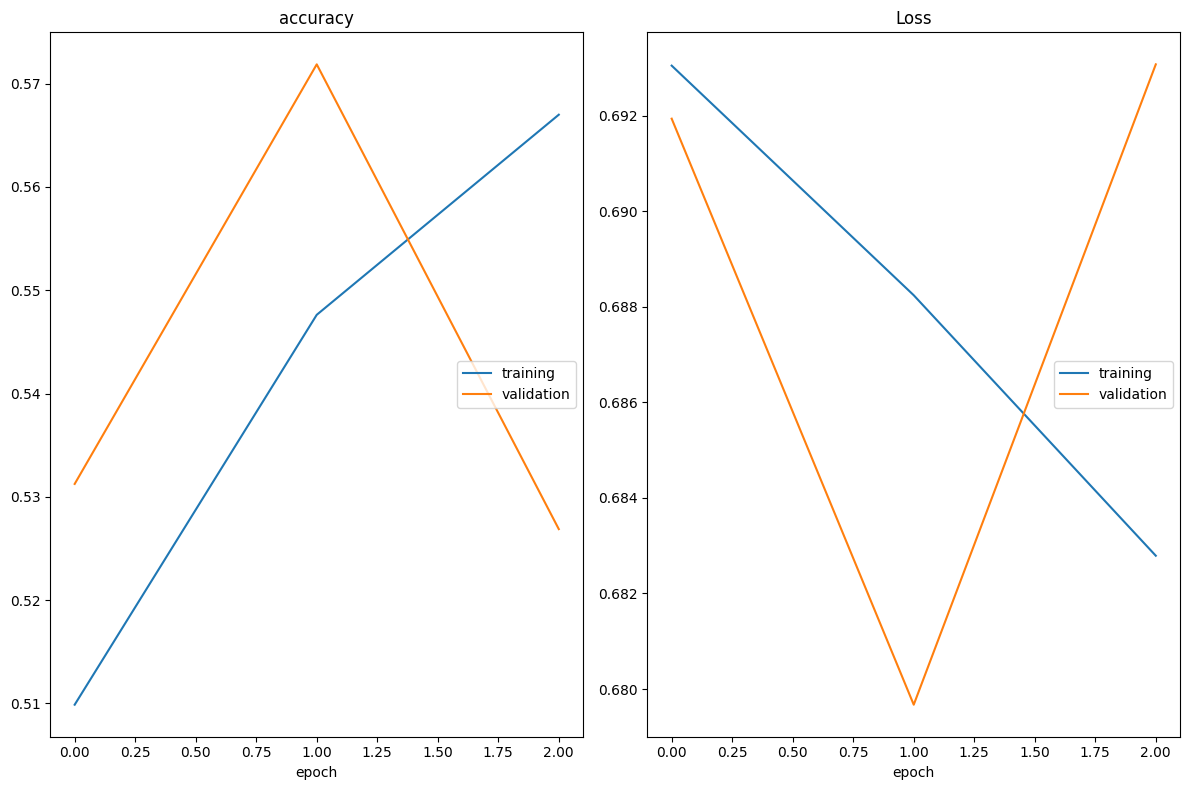

accuracy
	training         	 (min:    0.510, max:    0.567, cur:    0.567)
	validation       	 (min:    0.527, max:    0.572, cur:    0.527)
Loss
	training         	 (min:    0.683, max:    0.693, cur:    0.683)
	validation       	 (min:    0.680, max:    0.693, cur:    0.693)
500/500 [==============================] - 218s 434ms/step - loss: 0.6828 - accuracy: 0.5670 - val_loss: 0.6931 - val_accuracy: 0.5269
Epoch 4/30
183/500 [=========>....................] - ETA: 2:46 - loss: 0.6801 - accuracy: 0.5608

KeyboardInterrupt: 

In [37]:
model.fit(train_generator,
          epochs=30,
          steps_per_epoch=500,    # This is just a rule of thumb --> 8000 images in train set / 16 batch size
          validation_data=test_generator,
          validation_steps=100,   # This is just a rule of thumb --> 2000 images in test set / 16 batch size
          callbacks=[PlotLossesKerasTF(),es]
         )